# Load and Predict using keras model 

keras models graph can be save to various formats - json, yaml. 

> ```python
> # model is keras model instance
> model_json = model.to_json() 
> with open("fname.json", "w") as json_file:
>     json_file.write(model_json)
> ```

Once model is trained weights can be exported to hirarchical data format 5 file (.h5)
> ```python
> model.save_weights('fname.h5')
> ```

Graph and pretrained weights can later be used to make predictions for model. Notebook discusses how to load graph, weights and make predictions.

In [1]:
from keras.models import model_from_json
import numpy 
import matplotlib.pyplot as plt

# Library used for vizualization of model (install pydot, graphviz)
import pydot

Using TensorFlow backend.


# Read model
json string of model can be passed to ``keras.models.model_from_json`` to load model in keras model instance. Once model instance is created, ``model.load_weights('fname.h5')`` is used to instantiate model with pretrained weights

In [2]:
model = model_from_json(open("cat-dog-vanilla-cnn.json", "r").read())
model.load_weights("cat-dog-vanilla-cnn.h5")

In [7]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        18496     
__________

In [4]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [6]:
from keras.utils import plot_model
plot_model(model, to_file='cat-dog-vanilla-cnn.png', show_shapes=True)

In [70]:
from keras.preprocessing.image import ImageDataGenerator

pred = ImageDataGenerator(rescale=1./255)
pred_gen = pred.flow_from_directory("validation", target_size=(150, 150), batch_size=10, classes=['dog', 'cat'], class_mode='binary' )
img, lab = pred_gen[0]
prediction = model.predict_classes(img, 10, verbose=1)

Found 2000 images belonging to 2 classes.
10/10 [==============================] - 0s 16ms/step


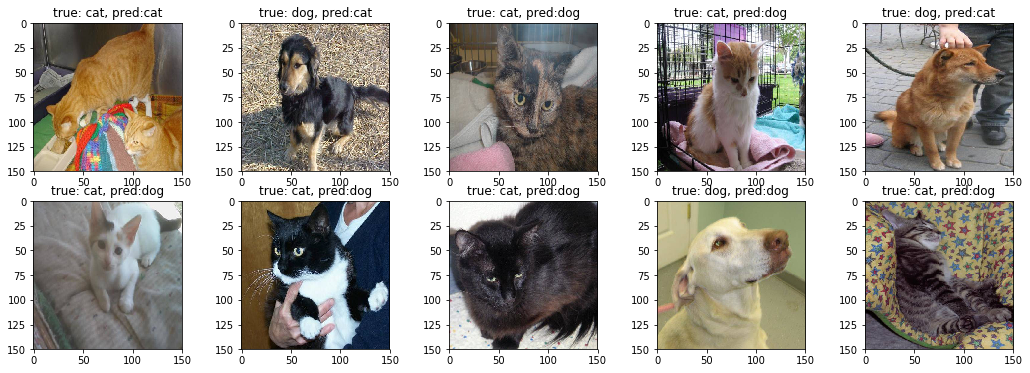

In [71]:
fig, ax = plt.subplots(nrows=len(lab)//5, ncols=5)
fig.set_figwidth(18)
fig.set_figheight(6)
label  = ["dog", "cat"]
for i in range(len(lab)):
    a, b = i//5, i-(i//5)*5
    ax[a,b].imshow(img[i])
    ax[a,b].set_title("true: " + label[int(lab[i])] + ", pred:" + label[int(prediction[i])])

# Predicting using Model Json and weights


In [ ]:
label  = ["dog", "cat"] # string labels for categorical vars
ncol   = 5 # number of columns in subplots, int
model_json = "vgg16 bottleneck cat-dog.json" # Path to model json export
model_weight = top_model_weights_path # path to model weights

# Import before function call 
from keras.models import model_from_json
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

def predict(model_json, model_weight, label, ncol=5):
    model = model_from_json(open(model_json, "r").read())
    model.load_weights(model_weight)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

    pred = ImageDataGenerator(rescale=1./255)
    pred_gen = pred.flow_from_directory("validation", target_size=(150, 150), batch_size=10, classes=['dog', 'cat'], class_mode='binary' )
    img, lab = pred_gen[0]

    model_vgg_trunc = applications.VGG16(include_top=False, weights='imagenet')
    bottleneck_features = model_vgg_trunc.predict(img)

    prediction = model.predict_classes(bottleneck_features)

    fig, ax = plt.subplots(nrows=len(lab)//ncol, ncols=ncol)
    fig.set_figwidth(18)
    fig.set_figheight(6)

    for i in range(len(lab)):
        a, b = i//ncol, i-(i//ncol)*ncol
        ax[a,b].imshow(img[i])
        ax[a,b].set_title("true: " + label[int(lab[i])] + ", pred:" + label[int(prediction[i])])

# function call
predict(model_json, model_weight, label, ncol)